## Plots and models for analysis of relation between cooperation and wealth

M. Tsvetkova, **The effects of reputation on inequality in network cooperation games**, *Phil. Trans. B* (2021).



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sb
from scipy.stats import binom_test
import statsmodels.formula.api as smf
from sklearn import preprocessing

import os
import sys

module_path = os.path.abspath(os.path.join('../modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from ineq import *
from plot import *


# Plots

### 1. Define data function

In [22]:
def get_data(dirname, tmnt):
    
    df = pd.read_csv(os.path.join('../data/', dirname+'_data.csv'))
    if len(tmnt) > 1:
        df = df[(df['version'] == tmnt[0]) & (df['reputation'] == tmnt[1])]
    else:
        df = df[df['reputation'] == tmnt[0]]
    df = df[df['round'] == df.groupby('group')['round'].transform('max')] 
    
    
    x = {var: {grp: df[df['group'] == grp][var].values \
               for grp in df['group'].unique()} for var in ['avg_action', 'wealth']}

    return x


### 2. Define plot parameters and functions

In [23]:
LABELS = {'wealth': 'Wealth', 'avg_action': 'Cooperation'}
MARKERS = ['o', 's', '^', 'd', 'p', 'v', '>', '<', '*', 'P', '+', '|', '_', 
          '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
    
def plot_correlations(var1, var2, figsize, dims, axlocs, \
                      titles, dirs, tmnts, colors, xlocs, ylocs, \
                      xlablocs, ylablocs, xlims, ylims, fname, quad=False):
    init_plot()
    f = plt.figure(figsize=figsize)
    
    axes = [plt.subplot2grid(dims, i) for i in axlocs]
    
    for i in range(len(dirs)):
        data = get_data(dirs[i], tmnts[i])
        cntr = 0
        for g in data[var1]:
            try:
                col = colors[tmnts[i][0]]
            except:
                col = colors[tmnts[i][1]]
            axes[i].scatter(data[var1][g], data[var2][g], \
                               color=col, marker=MARKERS[cntr], linewidths=0.25, s=10, edgecolors='k')
            cntr += 1

        # Add test results
        if quad == False:
            plot_fit(axes[i], data[var1], data[var2], 'X', 'Y', xlocs[i], ylocs[i])
        else:
            plot_fit_quad(axes[i], data[var1], data[var2], 'X', 'Y', xlocs[i], ylocs[i])

        # Add axis labels
        if i in xlablocs: 
            axes[i].set_xlabel(LABELS[var1], fontsize=6)
        if i in ylablocs: 
            axes[i].set_ylabel(LABELS[var2], fontsize=6)
        
        # Add titles and set axes limits
        axes[i].set_title(titles[i], fontsize=6)
        axes[i].set_xlim(0 - xlims[i]/5, xlims[i])
        axes[i].set_ylim(0 - ylims[i]/5, ylims[i])  
        
        # Plot histogram of var1
        ax2 = axes[i].twinx()  # a new axis that shares the same x-axis
        if col=='1': col = '0'
        var1hist = [i for g in data[var1] for i in data[var1][g] if ~np.isnan(i)]
        ax2.hist(var1hist, color=col, bins=10)
        ax2.set_ylim(0, 2.5*len(var1hist))
        clear_axis(ax2, 'y')
        
        # Plot histogram of var2
        ax3 = axes[i].twiny() # a new axis that shares the same y-axis
        var2hist = [i for g in data[var2] for i in data[var2][g] if ~np.isnan(i)]
        ax3.hist(var2hist, color=col, bins=10, orientation='horizontal')
        ax3.set_xlim(0, 2.5*len(var2hist))
        clear_axis(ax3, 'x')        

    plt.tight_layout(pad=1, w_pad=1, h_pad=1)
    plt.show()
    f.savefig('../plots/'+fname+'.pdf', format='pdf', bbox_inches='tight')
    

### 3. Plot for randomly rewired networks

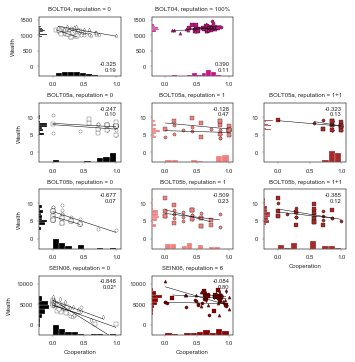

In [24]:
figsize=(4.9, 5)
dims = (4, 3)
axlocs = [(0,0), (0,1),
          (1,0), (1,1), (1,2), 
          (2,0), (2,1), (2,2),
          (3,0), (3,1)]
titles = ['BOLT04, reputation = 0', 'BOLT04, reputation = 100%', 
          'BOLT05a, reputation = 0', 'BOLT05a, reputation = 1', 'BOLT05a, reputation = 1+1',
          'BOLT05b, reputation = 0', 'BOLT05b, reputation = 1', 'BOLT05b, reputation = 1+1',
          'SEIN06, reputation = 0', 'SEIN06, reputation = 6']
dirs =  ['bolton04']*2 + ['bolton05']*6 + ['seinen']*2 
tmnts = [('reputation = 0', ), ('reputation = 100%', ),
         ('low cost', 'reputation = 0'), ('low cost', 'reputation = 1'), ('low cost', 'reputation = 1+1'),
         ('high cost', 'reputation = 0'), ('high cost', 'reputation = 1'), ('high cost', 'reputation = 1+1'), 
         ('reputation = 0', ), ('reputation = 6', )]
colors = {'reputation = 0':'1', 'reputation = 1':'lightcoral', 'reputation = 1+1': 'brown', 
          'reputation = 6':'darkred', 'reputation = 100%':'mediumvioletred'}
xlocs = [0.95]*10
ylocs = [0.08]*2 + [0.78]*8
xlablocs = [7, 8, 9]
ylablocs = [0, 2, 5, 8]
xlims = [1.075]*10
ylims = [1600]*2 + [14]*6 + [12000]*2
plot_correlations('avg_action', 'wealth', figsize, dims, axlocs, \
                  titles, dirs, tmnts, colors, xlocs, ylocs, xlablocs, ylablocs, \
                  xlims, ylims, fname='fig_4', quad=False)


### 4. Plot for strategically updated networks

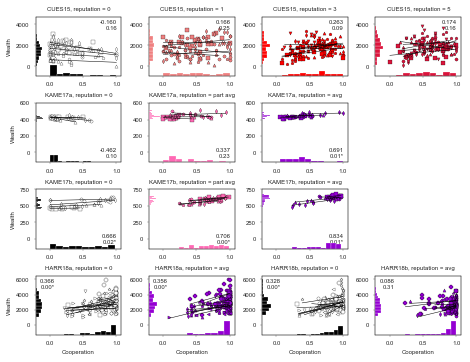

In [25]:
figsize = (6.5, 5)
dims = (4, 4)
axlocs = [(0,0), (0,1), (0,2), (0,3),
          (1,0), (1,1), (1,2), 
          (2,0), (2,1), (2,2),
          (3,0), (3,1), (3,2), (3,3)]
titles = ['CUES15, reputation = 0', 'CUES15, reputation = 1', 'CUES15, reputation = 3', 'CUES15, reputation = 5',
         'KAME17a, reputation = 0', 'KAME17a, reputation = part avg', 'KAME17a, reputation = avg', 
         'KAME17b, reputation = 0', 'KAME17b, reputation = part avg', 'KAME17b, reputation = avg',
          'HARR18a, reputation = 0', 'HARR18a, reputation = avg', 'HARR18b, reputation = 0', 'HARR18b, reputation = avg']
dirs = ['cuesta']*4 + ['kamei']*6 + ['harrell']*4
tmnts = [('reputation = 0',), ('reputation = 1', ), ('reputation = 3', ), ('reputation = 5',),
        ('low gain', 'reputation = 0'), ('low gain', 'reputation = 50%'), ('low gain', 'reputation = 100%'),
        ('high gain', 'reputation = 0'), ('high gain', 'reputation = 50%'), ('high gain', 'reputation = 100%'),
        ('mixed', 'reputation = 0'), ('mixed', 'reputation = 100%'), ('dynamic', 'reputation = 0'), ('dynamic', 'reputation = 100%')]
colors = {'reputation = 0': '1', 'reputation = 1': 'lightcoral', 
          'reputation = 3': 'red', 'reputation = 5': 'crimson', 'reputation = 50%': 'hotpink', 
          'reputation = 100%': 'darkviolet'}
xlablocs = [10, 11, 12, 13]
ylablocs = [0, 4, 7, 10]
xlims = [1.075]*14
ylims = [4700]*4 + [600]*3 + [750]*3 + [6500]*4

xlocs = [0.95]*10 + [0.22]*4
ylocs = [0.78]*4 + [0.08]*6 + [0.78]*4
plot_correlations('avg_action', 'wealth', figsize, dims, axlocs, \
                  titles, dirs, tmnts, colors, xlocs, ylocs, xlablocs, \
                  ylablocs, xlims, ylims, fname='fig_s2', quad=False)


# Models

### 1. Define data and model functions

In [26]:
def _get_rep(t):
    if t=='reputation = 0':
        return 0
    else:
        return 1

    
def get_data_for_model(dirname, version=None):
    df = pd.read_csv(os.path.join('../data/', dirname+'_data.csv'))

    # Get last round only, and only for relevant version
    if version != None:
        df = df[(df['version']==version)]       
    df = df[df['round'] == df.groupby(['reputation', 'group'])['round'].transform('max')]    
    
    # Make dummy from reputation
    df['Rep'] = np.vectorize(_get_rep)(df['reputation'])
    # Standardize wealth
    df['wealth'] = preprocessing.scale(df['wealth'])
    
    df = df[['Rep', 'group', 'player', 'avg_action', 'wealth']]
    df.columns = ['Rep', 'Group', 'player', 'Coop', 'Wealth']

    return df

def get_model_results(df):
    res = smf.ols('Wealth ~ Coop + Rep + Rep * Coop', data=df).fit(cov_type='cluster',
          cov_kwds={'groups': df['Group']}, use_t=True)
    return res


### 2. Differences in the effect of reputation for randomly rewired networks

In [27]:
# Test differences in rewards to cooperation
# Rep = 1 if any reputation, 0 for the control of reputation = 0
# Note: for Trust game in BOLT04, cooperate = 1 for buyer if they buy 
# and cooperate = 1 for seller if they sell once buyer has decided to buy
# Sellers who are not given the opportunity to make a decision are not included
for params in [('bolton04',), \
               ('bolton05', 'low cost'), ('bolton05', 'high cost'),
               ('seinen',)]:
    df = get_data_for_model(*params)
    res = get_model_results(df)
    print('***', params, '***')
    print(res.summary())


*** ('bolton04',) ***
                            OLS Regression Results                            
Dep. Variable:                 Wealth   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     94.24
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           8.06e-05
Time:                        10:34:49   Log-Likelihood:                -110.92
No. Observations:                  96   AIC:                             229.8
Df Residuals:                      92   BIC:                             240.1
Df Model:                           3                                         
Covariance Type:              cluster                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0305      0.5

### 3. Differences in the effect of reputation for strategically updated networks

In [28]:
for params in [('cuesta',), \
               ('kamei', 'low gain'), ('kamei', 'high gain'),
               ('harrell', 'mixed'), ('harrell', 'dynamic')]:
    df = get_data_for_model(*params)
    df = df.dropna() # Harrell has missing values
    res = get_model_results(df)
    print('***', params, '***')
    print(res.summary())
    

*** ('cuesta',) ***
                            OLS Regression Results                            
Dep. Variable:                 Wealth   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     29.83
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.66e-05
Time:                        10:34:49   Log-Likelihood:                -672.96
No. Observations:                 486   AIC:                             1354.
Df Residuals:                     482   BIC:                             1371.
Df Model:                           3                                         
Covariance Type:              cluster                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1985      0.368